<span style="color:orange;font-size:20px"><b> Import </b></span><br>

!pip install -r ./requirements.txt

In [5]:
# Base
import numpy as np
import pandas as pd

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

<span style="color:orange;font-size:20px"><b> Data </b></span><br>

In [6]:
df_train = np.load("../data/train.npz")
X_train = df_train['arr_0']
y_train = df_train['arr_1']

df_test = np.load("../data/test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

<span style="color:orange;font-size:20px"><b> Exploratory Data Analysis  </b></span><br>

In [47]:
print('train:', X_train.shape, y_train.shape, '\n test:', X_test.shape, y_test.shape)

train: (4000, 8, 3) (4000,) 
 test: (1000, 8, 3) (1000,)


(0.0, 1.0)

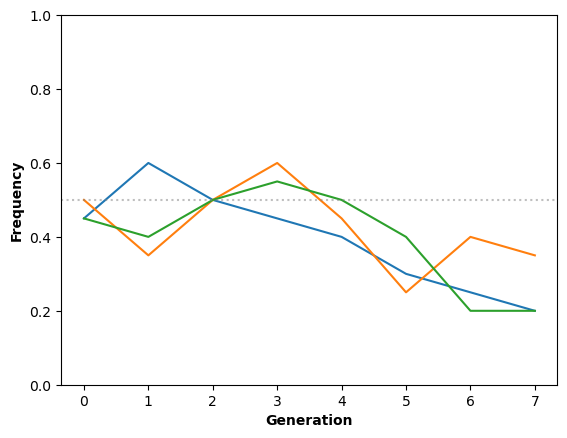

In [52]:
plt.plot(X_test[0])
plt.axhline(0.5, alpha=.5, linestyle='dotted', c='gray')
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Generation', fontweight='bold')
plt.ylim([0, 1])

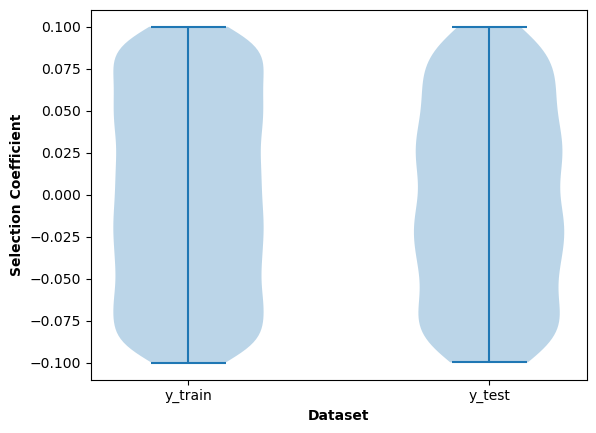

In [40]:
data = [y_train, y_test]

plt.violinplot(data)
plt.xticks([1, 2], ['y_train', 'y_test'])
plt.ylabel('Selection Coefficient', fontweight='bold')
plt.xlabel('Dataset', fontweight='bold')
plt.show()


<span style="color:orange;font-size:20px"><b> Create Neural Network  </b></span><br>

In [6]:
model = keras.Sequential([
    # Input Layer + Flatten
    keras.layers.Input((8, 3)),
    keras.layers.Flatten(),
    
    # Hidden Layers
    keras.layers.Dense(68, activation='relu'),
    keras.layers.Dense(68, activation='relu'),
    keras.layers.Dense(68, activation='relu'),

    # Output Layer
    keras.layers.Dense(1, activation='linear')
])

# Optimizer
optimizer = keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 68)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,153 (43.57 KB)

 Trainable params: 11,153 (43.57 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
keras.backend.clear_session()

def build_model( num_layers, num_neurons):
    model = keras.Sequential()
    
    # Input Layer + Flatten
    model.add( layers.Input((8, 3)) ),
    model.add( layers.Flatten() )

    # Hidden Layers
    for _ in range(int(num_layers)):
        model.add(layers.Dense(int(num_neurons), activation='relu'))

    # Output Layer
    model.add(layers.Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

In [88]:
model   = build_model(1, 32)
history = model.fit( X_train, y_train, epochs=100, shuffle = True, validation_split=0.2)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0525 - mae: 0.1674 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.0049 - mae: 0.0545 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0029 - mae: 0.0411 - val_loss: 0.0020 - val_mae: 0.0351
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.0015 - mae: 0.0285 - val_loss: 0.0013 - val_mae: 0.0260
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.0012 - mae: 0.0248 - val_loss: 0.0011 - val_mae: 0.0228
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.0011 - mae: 0.0224 - val_loss: 9.8811e-04 - val_mae: 0.0217
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.0011 - mae: 0.0224 - val_loss: 8.9153e-04 - val_mae: 0.0206
Epoch 9/100
100/100 ━━━━━━

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 68)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,153 (43.57 KB)

 Trainable params: 11,153 (43.57 KB)

 Non-trainable params: 0 (0.00 B)

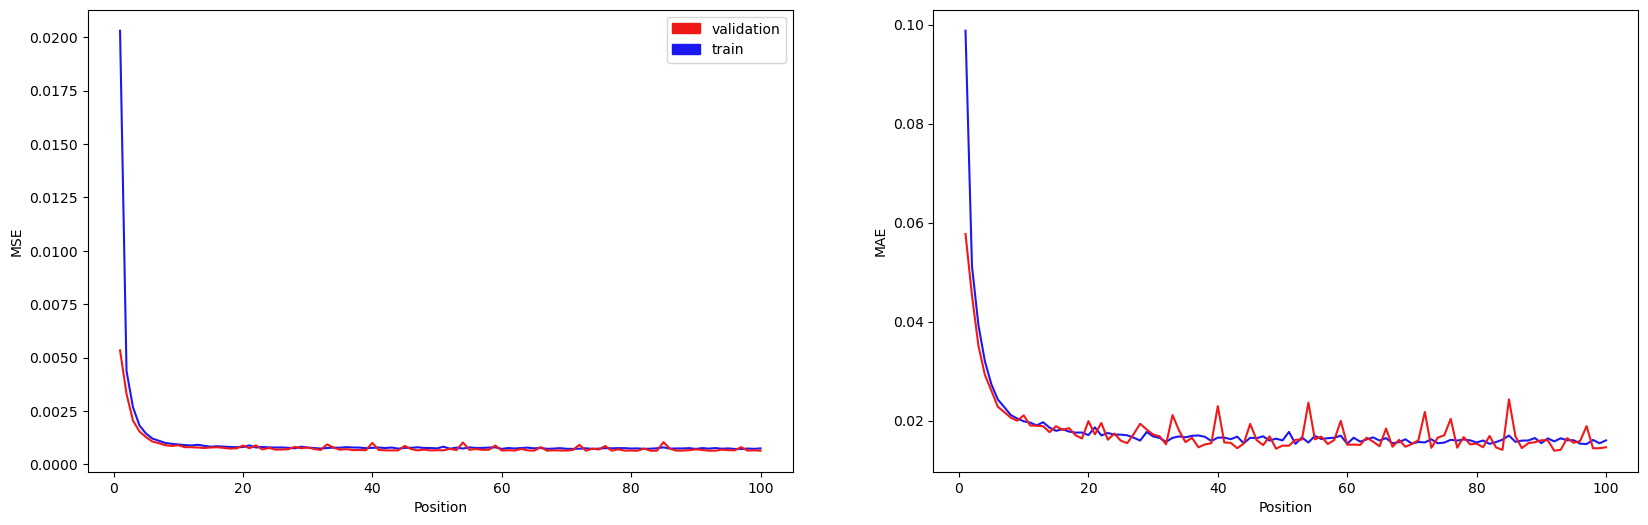

In [89]:
val = mpatches.Patch(color='#F11818', label='validation')
trn = mpatches.Patch(color='#1C18F1', label='train')

# Access the training history
loss     = history.history['loss']
acc      = history.history['mae']
val_loss = history.history['val_loss']
val_acc  = history.history['val_mae']
epochs   = range(1, 101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes[0].plot(epochs, loss, '#1C18F1')
axes[0].plot(epochs, val_loss, '#F11818')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('MSE')
axes[0].legend(handles=[val, trn])

axes[1].plot(epochs, acc, '#1C18F1')
axes[1].plot(epochs, val_acc, '#F11818')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('MAE')

plt.show()

In [11]:
df_test = np.load("../data/test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

y_pred = model.predict(X_test)
print(y_pred[:5])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
[[0.21674162]
 [0.10302512]
 [0.22084002]
 [0.14021137]
 [0.29180652]]


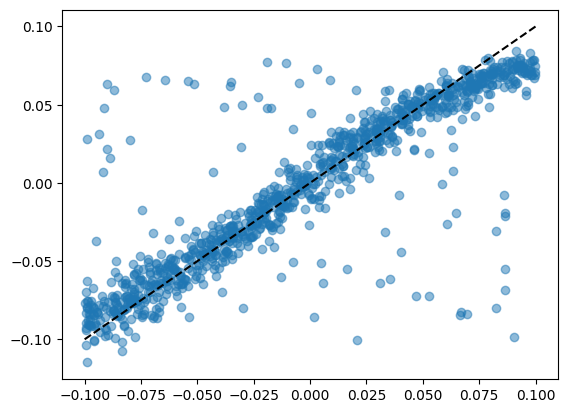

In [34]:
plt.scatter(y_test, y_pred, alpha=.5)
plt.plot([-0.1, 0.1], [-0.1, 0.1], c="black", linestyle="dashed")

In [92]:
#np.save('./preds.npy', y_pred)

In [12]:
aa = np.load('../data/preds.npy')

In [13]:
y_pred.shape

(1000, 1)

In [15]:
np.corrcoef(y_pred.reshape(1000), y_test)

array([[1.        , 0.75779881],
       [0.75779881, 1.        ]])

In [39]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    """
    Build and compile a Keras model using hyperparameters from Keras Tuner.

    Parameters:
        hp (HyperParameters): Object containing hyperparameter search space.

    Returns:
        keras.Model: Compiled model.
    """
    model = keras.Sequential()
    model.add(layers.Input((8, 3)))
    model.add(layers.Flatten())

    # Tune the number of layers
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    model.add(layers.Dense(1, activation="linear"))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [40]:
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_loss",
    max_trials=50,
    executions_per_trial=1,
    directory="tuner_logs",
    project_name="bayesian_opt"
)


E0000 00:00:1750778390.720231    5677 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1750778390.721192    5677 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [41]:
df_train = np.load("./train.npz")
X_train = df_train['arr_0']
y_train = df_train['arr_1']

In [42]:
X_train.shape

(10000, 8, 3)

In [43]:
tuner.search(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Trial 50 Complete [00h 00m 10s]
val_loss: 0.01199490949511528

Best val_loss So Far: 0.0007106245611794293
Total elapsed time: 00h 08m 01s


In [44]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print(best_hps.values)

best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Best hyperparameters:
{'l1': 0.0, 'l2': 0.0, 'num_layers': 5, 'units_0': 16, 'learning_rate': 0.01, 'units_1': 16, 'units_2': 16, 'units_3': 16, 'units_4': 16}
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0028 - mae: 0.0297 - val_loss: 7.6132e-04 - val_mae: 0.0159
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 7.5484e-04 - mae: 0.0169 - val_loss: 7.4919e-04 - val_mae: 0.0158
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8890e-04 - mae: 0.0162 - val_loss: 7.3823e-04 - val_mae: 0.0162
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 7.8338e-04 - mae: 0.0167 - val_loss: 7.2401e-04 - val_mae: 0.0147
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 7.8884e-04 - mae: 0.0162 - val_loss: 8.8019e-04 - val_mae: 0.0201
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7009e-04 - mae: 0.0161 - val_loss: 7.3899e-04 - val_mae: 0.0150
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2484e-04 - mae: 0.01

In [45]:
df_test = np.load("./test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

y_pred = best_model.predict(X_test)
print(y_pred[:5])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0011 - mae: 0.0223 - val_loss: 0.0011 - val_mae: 0.0232
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 7.8664e-04 - mae: 0.0170 - val_loss: 7.4832e-04 - val_mae: 0.0142
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 7.6051e-04 - mae: 0.0164 - val_loss: 8.7432e-04 - val_mae: 0.0187
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4986e-04 - mae: 0.0178 - val_loss: 7.9120e-04 - val_mae: 0.0158
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 7.1819e-04 - mae: 0.0156 - val_loss: 9.8642e-04 - val_mae: 0.0221
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 7.6462e-04 - mae: 0.0165 - val_loss: 8.5823e-04 - val_mae: 0.0187
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 7.3443e-04 - mae: 0.0162 - val_loss: 7.5016e-04 - val_mae: 0.0144
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 7.1855e-04 - mae: 0.0151 - val_loss: 7.8052e-04 - val_

In [47]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,517 (17.65 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,012 (11.77 KB)

In [25]:
sigma = pd.read_csv('./sigma_output.csv')

In [2]:
df_test = np.load("./test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

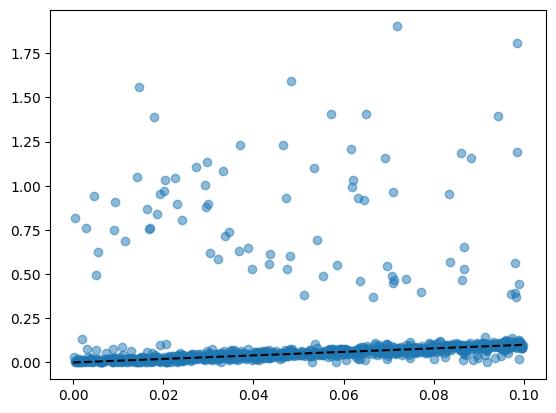

In [7]:
plt.scatter(abs(y_test), abs(sigma*2), alpha=.5)
plt.plot([0, 0.1], [0, 0.1], c="black", linestyle="dashed")

(-0.01, 0.15)

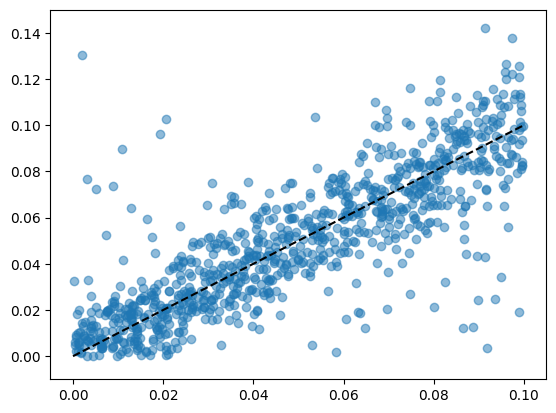

In [5]:
plt.scatter(abs(y_test), abs(sigma*2), alpha=.5)
plt.plot([0, 0.1], [0, 0.1], c="black", linestyle="dashed")
plt.ylim(-0.01, 0.15)

In [9]:
y_pred = np.load("./preds.npy")

(-0.01, 0.15)

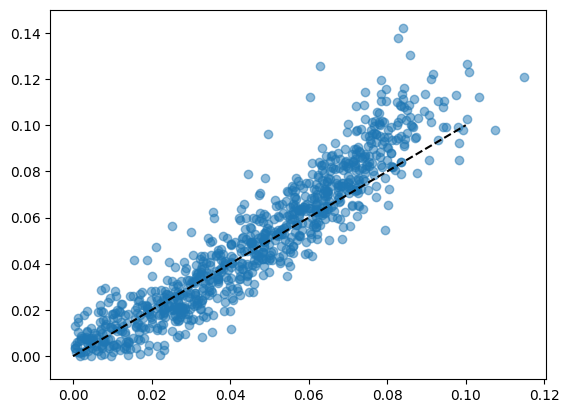

In [10]:
plt.scatter(abs(y_pred), abs(sigma*2), alpha=.5)
plt.plot([0, 0.1], [0, 0.1], c="black", linestyle="dashed")
plt.ylim(-0.01, 0.15)

In [22]:
sigma.to_numpy().reshape(-1)

(1000, 1)

In [26]:
pred1 = (y_test.reshape(-1)-y_pred.reshape(-1))**2
res_sigma = (abs(y_test.reshape(-1)) - abs(sigma.to_numpy().reshape(-1)*2))**2